# Project 3 - DTFT Explainer
Andrew Koren

This project serves to give an overview of the 2D FFT transform, including an explanation of the maths behind the transformation and what it means to work in a space outside of realspace. Part of the importance of this project comes from breaking down information stored in more than three dimensions (2 dimensions * real&imaginary values), and building intution needed to predict transformation and inverse transformation outputs.

## Going from 1D to 2D

Alongside the 1D fourier transforms we've discussed in class, there are also 2D (and higher dimension) fourier transforms. Just as the usual fourier transforms translate a signal/function to their periodic components, a 2D fourier transform can convert a 2D signal into two-dimensional periodic components. 


In 1D, we discussed the discrete fourier transform, which has the formula
$$
FT(k) = \sum_{n=0}^{N-1} f(n)e^{-i2\pi \frac{k}{N}n}
$$
Which is the discretized version of fourier series. 

Using DFT, we were able to analyze signals by the frequencies present, where amplitdue is the amplitude of the signal. 

The formula for 1D DFT is easily generalized to 2D or even higher dimensions. In short, each point in the transformed signal represents both x and y periodicity. The 2D formula is

$$
FT(u,v) = \frac{1}{MN} \sum_{m=0}^{M-1}\sum_{n=0}^{N-1} f(m,n)e^{-i 2\pi \left(\frac{u}{M}m + \frac{v}{N}n \right)}
$$
[1]

This formula is actually not super complicated, especially if you can dissect the exponential portion. Each point $(u,v)$ in the transformed space depends on all points $f(m,n)$, which are indexed through using the two sums. Each point is weighted by the exponential, which matches each real space point's weight to the k-space contribution which the point $(u,v)$ contributes. That being said, here's an example of a 2D discrete fourier transform (aka discrete-time fourier transform DTFT) looks like.

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
from seaborn import cm
import numpy as np
from numpy import fft

grayscale = sns.color_palette(palette='Greys')
grayscale.reverse()
gray_cmap = ListedColormap(grayscale)

The DTFT can find the fourier transform of any image, so long as it is entirely made of complex values. Unfortunately color cannot be represented as a complex value while having a meaningful encoding for DTFT. We use the implementation from numpy.fft, and all image files have been zipped in with this project. Let's take the fourier transform of this cat.

<Axes: >

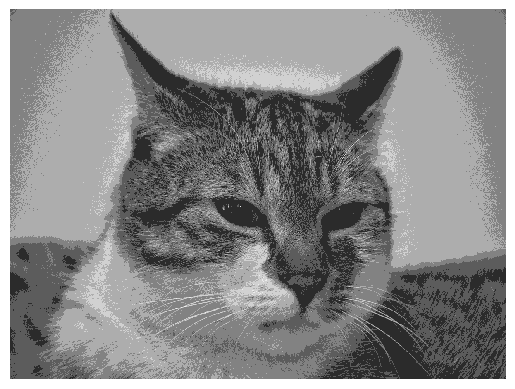

In [79]:
img = Image.open('grayscale-cat.jpg').convert('L') #'L' for grayscale

img_as_np = np.asarray(img)

#grayscale = sns.cm.rocket #- produces rocket cat

sns.heatmap(img_as_np, cmap=grayscale, xticklabels=False, yticklabels=False, cbar=False)

Text(0.5, 1.0, 'Phase $\\left(\\tan(im/re)\\right)$')

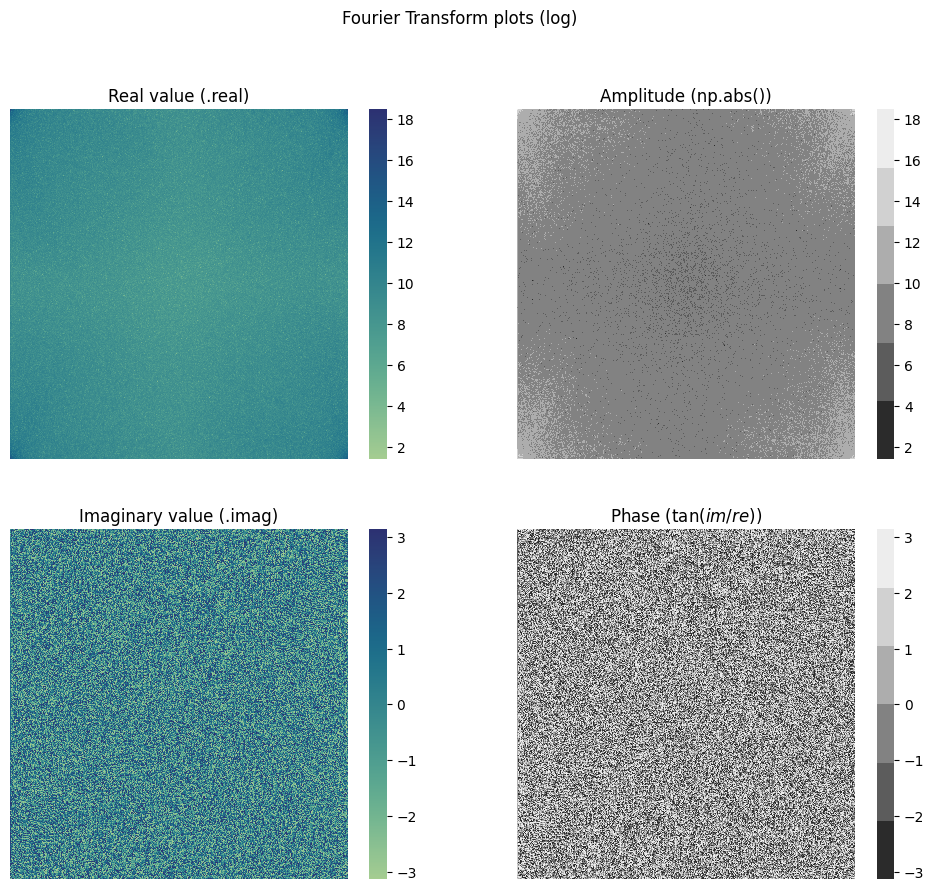

In [16]:
img_fft = fft.fft2(img_as_np)

fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(12)

fig.suptitle('Fourier Transform plots (log)')
sns.heatmap(np.log(img_fft).real, cmap=cm.crest, xticklabels=False, yticklabels=False, ax=axs[0, 0])
axs[0,0].set_title('Real value (.real)')
sns.heatmap(np.log(np.abs(img_fft)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0, 1])
axs[0,1].set_title('Amplitude (np.abs())')

sns.heatmap(np.log(img_fft).imag, cmap=cm.crest, xticklabels=False, yticklabels=False, ax =axs[1, 0])
axs[1,0].set_title('Imaginary value (.imag)')

sns.heatmap(np.atan2(img_fft.imag, img_fft.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax =axs[1, 1])
axs[1,1].set_title(r'Phase $\left(\tan(im/re)\right)$')


Since the output is a 2D array of complex values, plotting isn't super easy. Plotting the real and imaginary values is a common approach (logarithmic plots on the left), but the information stored in the fourier transform is better represented as amplitude and phase (plots on the right), since these describe the relevance of each point in k-space relative to real space, as well as position in real space relative to k-space.

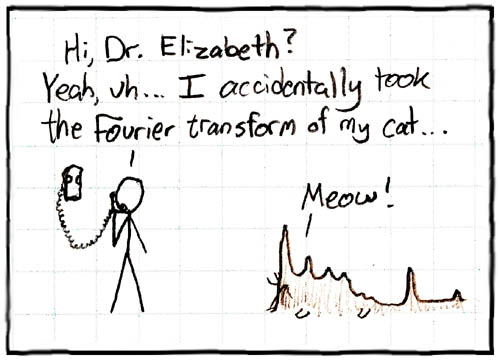 https://xkcd.com/26/

This is exactly what we've been discussing for 1D for the past week, so we should be relatively familiar with the concept by now. Even so, reading the formula doesn't provide very good intuition for what is really going on, or what we can actually use the DTFT for. To help build up intution on the meaning of the formula, let's go back a few steps and consider the transformation of a single pixel

<Axes: >

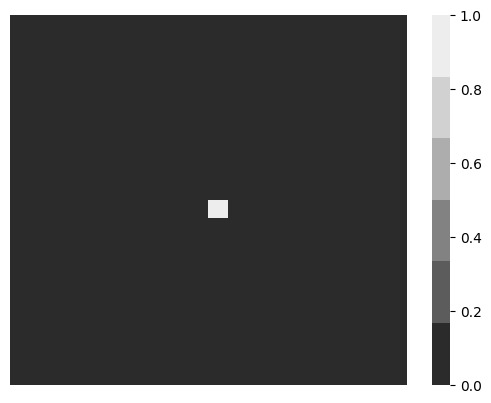

In [17]:
spatial_image = np.zeros((20,20))
spatial_image[10, 10] = 1

sns.heatmap(spatial_image, xticklabels=False, yticklabels=False, cmap=grayscale)

The plot above is only a signle pixel located at the center of the plot, so we can actually write out the fourier transform without any summation

$$
FT_{u, v} = \frac{1}{20*20} e^{-i 2\pi \left(\frac{u}{20}10 + \frac{v}{20}10 \right)}\\
= e^{-i\pi\left(u + v \right)}/400
$$
This results in a checkerboard pattern of periodic terms adding and subtracting, a result which is verified below.

In [18]:
transformed_image = fft.fft2(spatial_image)
transformed_image[:3]

array([[ 1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j,
        -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,
         1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j],
       [-1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,
         1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j,
        -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j],
       [ 1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j,
        -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,
         1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j]])

It looks like the numpy implementation does not include the division term. This makes sense, since amplitude only has importance relative to other points, so scaling down isn't especially important. The plot below shows the result of this

Text(0.5, 1.0, 'Phase')

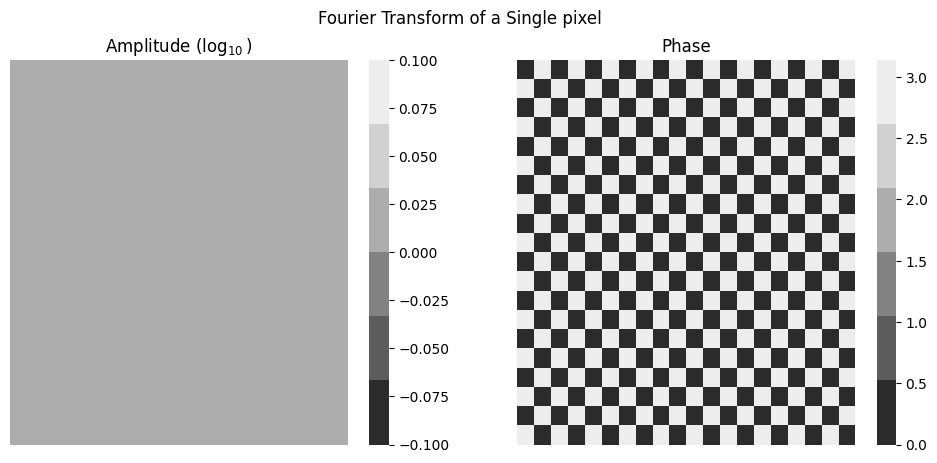

In [19]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)

fig.suptitle('Fourier Transform of a Single pixel')

sns.heatmap(np.log10(np.abs(transformed_image)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title(r'Amplitude $\left(\log_{10}\right)$')

sns.heatmap(np.atan2(transformed_image.imag, transformed_image.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Phase')

This is analogous to how a dirac-delta function or some similar 'point' function must be composed of oscillating functions which cancel each other out. 

Before exploring more examples of transforms, we should mention the other half of the puzzle: the inverse DTFT. 


$$
f(m,n) = \sum_{u=0}^{M-1}\sum_{v=0}^{N-1}F(u,v)e^{i2\pi\left(\frac{u}{M}m + \frac{v}{N}n \right)}
$$

Which, for a single point at $(u,v)$ in k-space boils down to the same thing

$$
f(m,n) = ze^{i2\pi\left(\frac{u}{M}m + \frac{v}{N}n \right)}\\
z = F(u,v)
$$


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, IntSlider
%matplotlib inline 

grid_size = 20
heatmap = np.zeros((grid_size, grid_size), dtype=complex) #using same names as before because I'm lazy

def update(x, y, phase):
    heatmap[:] = 0+0j
    heatmap[y, x] = np.cos(phase) + 1j*np.sin(phase)
    ft_heatmap = fft.ifft2(heatmap)*400

    fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
    ax0.imshow(heatmap.real, cmap=gray_cmap, interpolation="nearest", vmin=-1, vmax=1)
    ax0.set_title('k-space')
    ax1.imshow(ft_heatmap.real, cmap=gray_cmap, interpolation="nearest", vmin=-1, vmax=1)
    ax1.set_title('real space')
    ax2.imshow(ft_heatmap.imag, cmap=gray_cmap, interpolation="nearest", vmin=-1, vmax=1)
    ax2.set_title('imaginary space')
    plt.show()

# Set up sliders
interact(
    update,
    x=IntSlider(value=10, min=0, max=grid_size - 1, step=1, description="X Position"),
    y=IntSlider(value=10, min=0, max=grid_size - 1, step=1, description="Y Position"),
    phase = IntSlider(value=0, min=-2*np.pi, max=2*np.pi, step=0.1, description="Phase")
);

interactive(children=(IntSlider(value=10, description='X Position', max=19), IntSlider(value=10, description='…

In [39]:
heatmap = np.zeros((grid_size, grid_size), dtype=complex)
heatmap[0, 0] = 100

fft.ifft2(heatmap)

array([[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
        0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
        0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
        0.25+0.j, 0.25+0.j],
       [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
        0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
        0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
        0.25+0.j, 0.25+0.j],
       [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
        0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
        0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
        0.25+0.j, 0.25+0.j],
       [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
        0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
        0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
        0.25+0.j, 0.25+0.j],
       [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,


Talk about math

Some periodic structures

<Axes: >

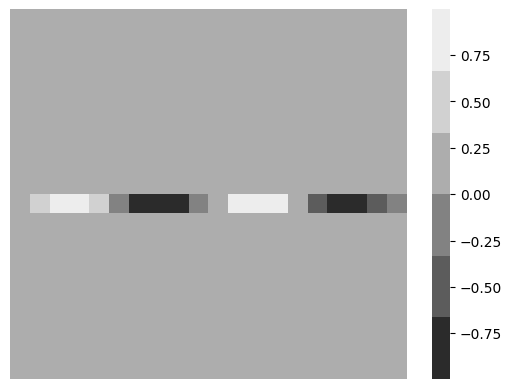

In [20]:
spatial_image = np.zeros((20,20))

x = np.linspace(-2*np.pi, 2*np.pi, 20)
spatial_image[10, :] = np.sin(x)

sns.heatmap(spatial_image, xticklabels=False, yticklabels=False, cmap=grayscale)

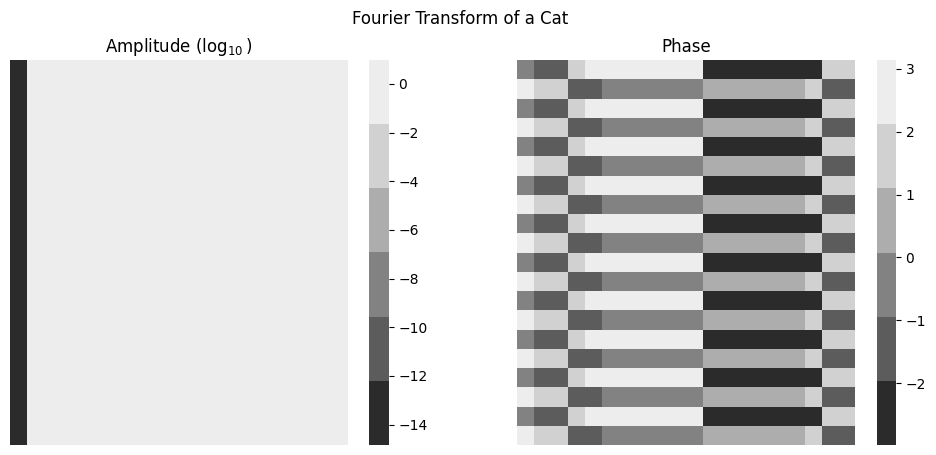

In [21]:
transformed_image = fft.fft2(spatial_image)

fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)

fig.suptitle('Fourier Transform of a Cat')

sns.heatmap(np.log10(np.abs(transformed_image)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title(r'Amplitude $\left(\log_{10}\right)$')

sns.heatmap(np.atan2(transformed_image.imag, transformed_image.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Phase');

Note that the bar on the left matches the frequency of the line, but there is destructive interference

Shotgun of various transforms

animation

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, IntSlider
%matplotlib inline 

grid_size = 20
heatmap = np.zeros((grid_size, grid_size))

def update(x, y):
    heatmap[:] = 0
    heatmap[y, x] = 1
    ft_heatmap = fft.fft2(heatmap)

    #yes I redraw the whole thing every time, it's the best I could do
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
    ax0.imshow(heatmap.real, cmap=gray_cmap, interpolation="nearest", vmin=0, vmax=1)
    ax1.imshow(abs(ft_heatmap), cmap=gray_cmap, interpolation="nearest", vmin=0, vmax=1)
    ax1.set_title('Amplitude')
    ax2.imshow(np.arctan2(ft_heatmap.imag, ft_heatmap.real), cmap=gray_cmap, interpolation="nearest", vmin=0, vmax=1)
    ax2.set_title('Phase')
    plt.show()

# Set up sliders
interact(
    update,
    x=IntSlider(value=10, min=0, max=grid_size - 1, step=1, description="X Position"),
    y=IntSlider(value=10, min=0, max=grid_size - 1, step=1, description="Y Position"),
);

interactive(children=(IntSlider(value=10, description='X Position', max=19), IntSlider(value=10, description='…

This works in VS code so it's good enough for me.

This interactive plot, as well as the one below, is meant to challenge your understanding of the 2D plot and help build intuition. 

Important questions to be answered.

## Personal Question - Removing watermark

An important thing we saw above is that many pixels on a fourier transformed image affect a single pixel on a normal plot. My question is: can we remove a periodic watermark from an image while keeping the original intact? Let's see if crossing lines can be removed

<Axes: >

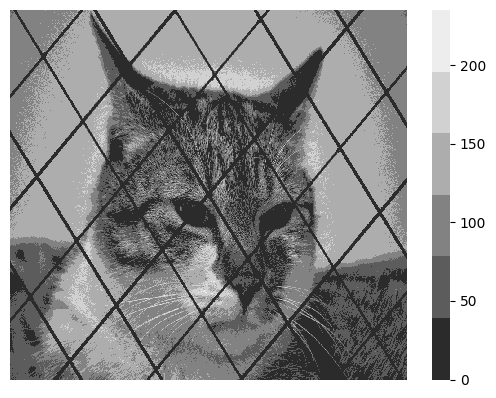

In [14]:
img2 = Image.open('grayscale-xover (1).png').convert('L')
img_as_np2 = np.asarray(img2)

sns.heatmap(img_as_np2, cmap=grayscale, xticklabels=False, yticklabels=False)

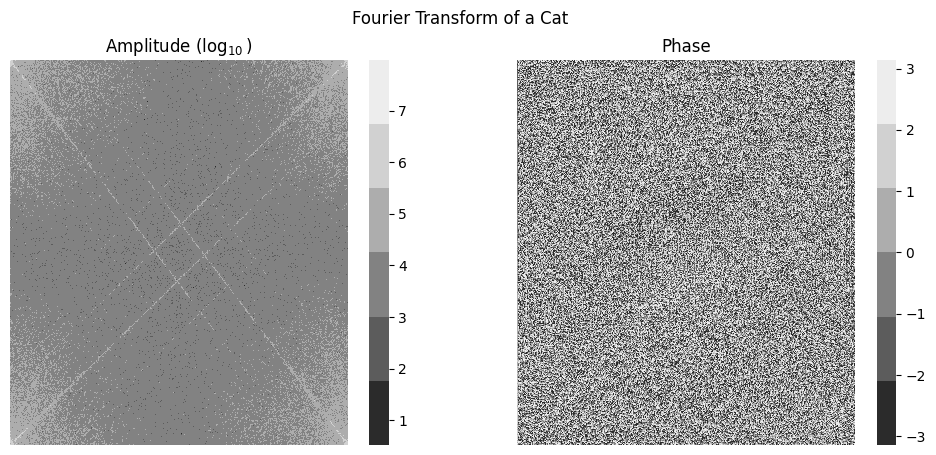

In [15]:
img_fft = fft.fft2(img_as_np2)

fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)

fig.suptitle('Fourier Transform of a Cat')

sns.heatmap(np.log10(np.abs(img_fft)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title(r'Amplitude $\left(\log_{10}\right)$')

sns.heatmap(np.atan2(img_fft.imag, img_fft.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Phase')

plt.show()

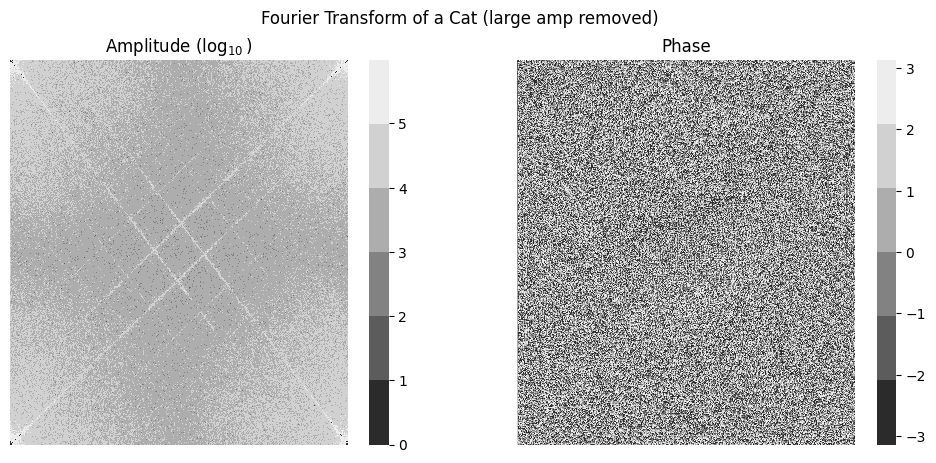

In [16]:
large_amp_removed = np.where(np.abs(img_fft) > 10**6, img_fft/np.abs(img_fft), img_fft)

fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)

fig.suptitle('Fourier Transform of a Cat (large amp removed)')

sns.heatmap(np.log10(np.abs(large_amp_removed)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title(r'Amplitude $\left(\log_{10}\right)$')

sns.heatmap(np.atan2(large_amp_removed.imag, large_amp_removed.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Phase')

plt.show()

<Axes: >

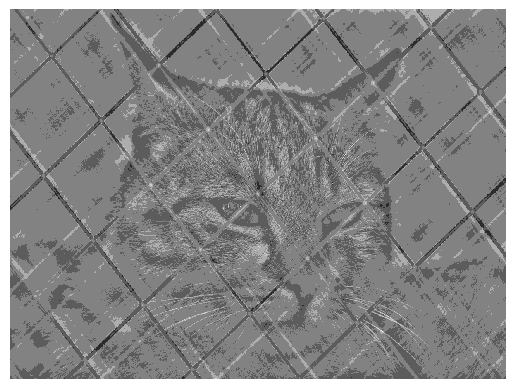

In [17]:
sns.heatmap(fft.ifft2(large_amp_removed).real, cmap=grayscale, xticklabels=False, yticklabels=False, cbar=False)

Well, that didn't quite work out. Since our cat 

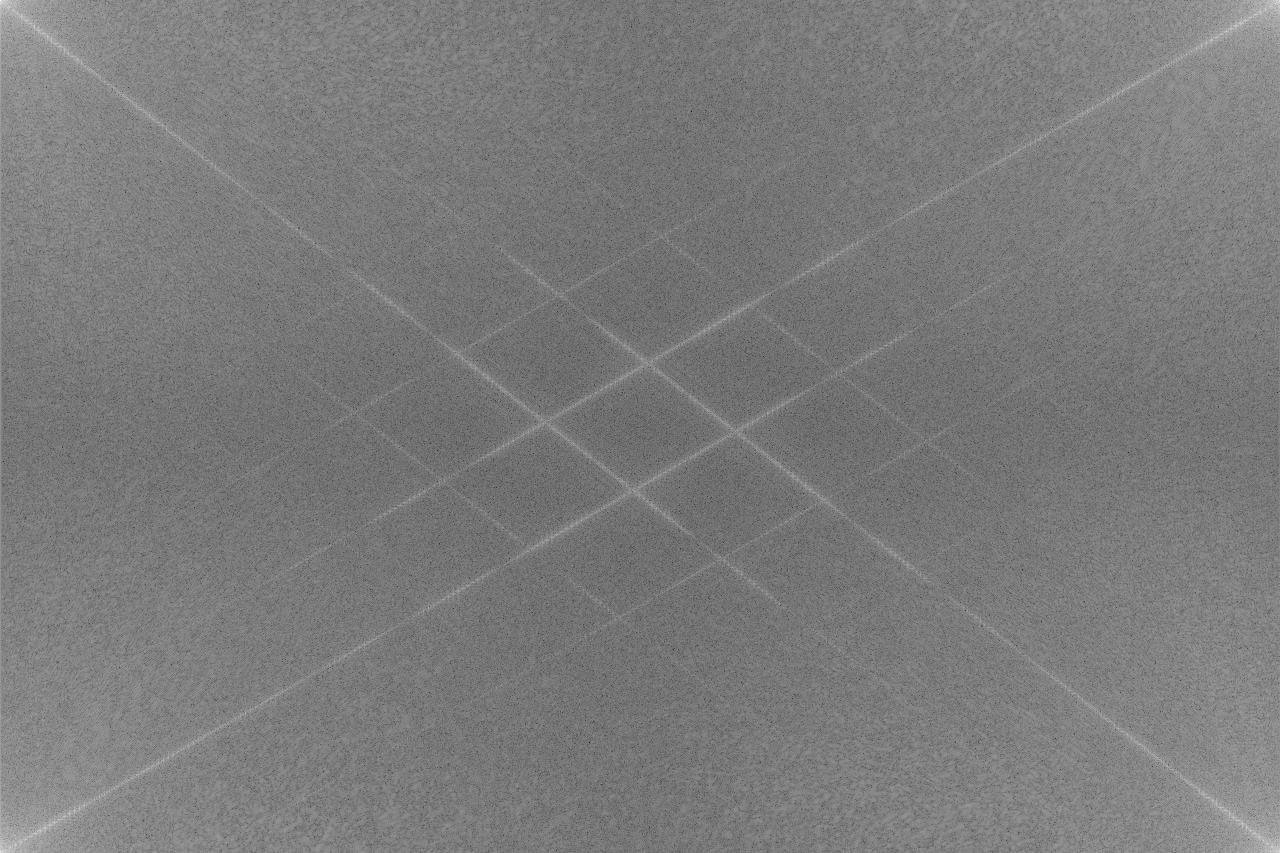

In [18]:
fft_log = np.log10(np.abs(img_fft))
fft_renorm = fft_log/fft_log.max() * 255

fft_as_png = Image.fromarray(fft_renorm.astype(np.uint8))
fft_as_png.save("Fourier_of_a_Cat.png")
fft_as_png

![alt text](mask.png)

C:\Users\andre\AppData\Local\Temp\ipykernel_22880\58316323.py:11: RuntimeWarning: divide by zero encountered in log10
  sns.heatmap(np.log10(np.abs(masked_cat)), cmap=grayscale, ax=axs[0], xticklabels=False, yticklabels=False)


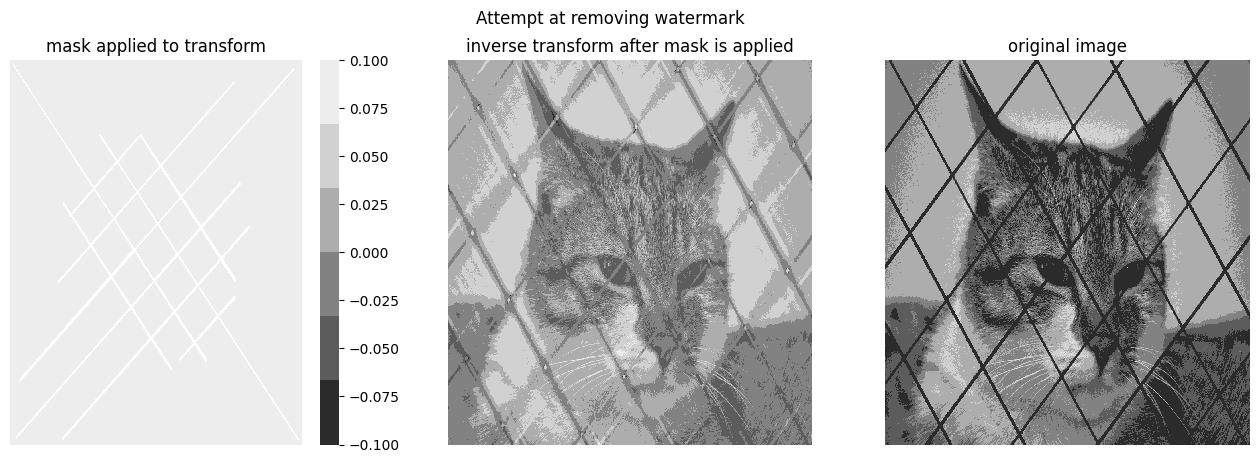

In [26]:
mask = Image.open('mask.png').convert('L')
np_mask = np.asarray(mask)

masked_cat = np.where(np_mask > 2, img_fft, 0)

fig, axs = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(16)

fig.suptitle('Attempt at removing watermark')
sns.heatmap(np.log10(np.abs(masked_cat)), cmap=grayscale, ax=axs[0], xticklabels=False, yticklabels=False)
axs[0].set_title('mask applied to transform')
sns.heatmap(fft.ifft2(masked_cat).real, cmap=grayscale, ax=axs[1], xticklabels=False, yticklabels=False, cbar=False)
axs[1].set_title('inverse transform after mask is applied')
sns.heatmap(img_as_np2, cmap=grayscale, xticklabels=False, yticklabels=False, cbar=False)
axs[2].set_title('original image');


Okay so not exactly cleared up. Seeing the result of applying the mask helps diagnose what went wrong. Remember that spatial information is stored in the phase of all points in the plot. While the mask took out the majority of the crossing lines, the location of the lines is still stored in the phases of all points, so they still appear.

Sources:

[https://en.wikipedia.org/wiki/Fourier_transform](https://en.wikipedia.org/wiki/Fourier_transform) <br>
[https://www.robots.ox.ac.uk/~az/lectures/ia/lect2.pdf](https://www.robots.ox.ac.uk/~az/lectures/ia/lect2.pdf)
[https://www.corsi.univr.it/documenti/OccorrenzaIns/matdid/matdid027832.pdf#page=3.00](https://www.corsi.univr.it/documenti/OccorrenzaIns/matdid/matdid027832.pdf#page=3.00)

Text(0.5, 1.0, 'imag')

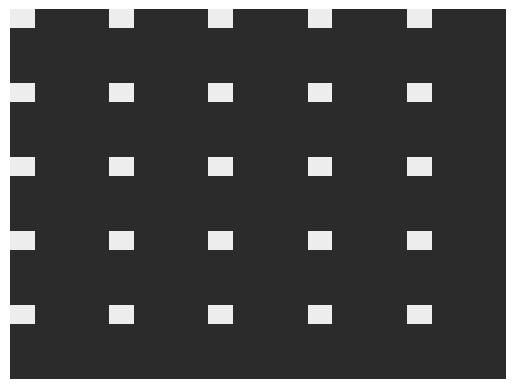

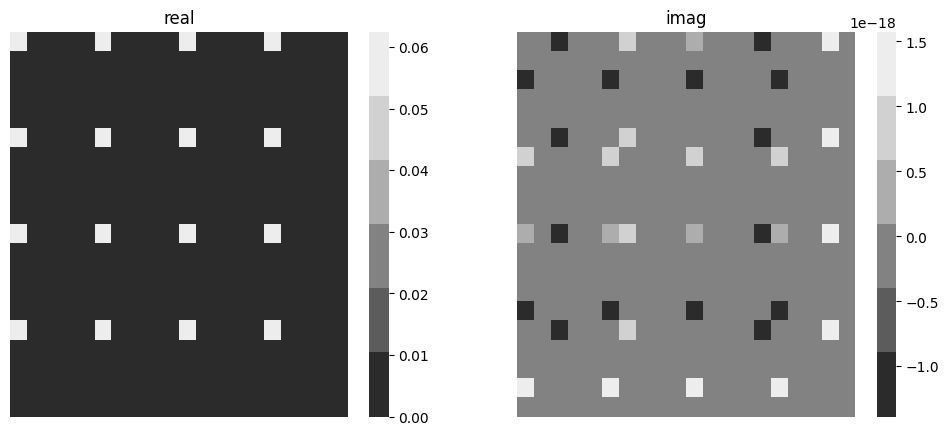

In [78]:
pixel_cover = np.zeros(shape=(20, 20))

points = np.arange(0, 20, 4)

pixel_cover[np.ix_(points, points)] = 1

sns.heatmap(pixel_cover, cmap=grayscale, xticklabels=False, yticklabels=False, cbar=False)

img_fft = fft.fft2(img_as_np)

fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)

#sns.heatmap(np.log10(np.abs(img_fft)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
#axs[0].set_title(r'Amplitude $\left(\log_{10}\right)$')
#
#sns.heatmap(np.atan2(img_fft.imag, img_fft.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
#axs[1].set_title('Phase')

out = fft.ifft2(pixel_cover)

sns.heatmap(out.real, cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title('real')

sns.heatmap(out.imag, cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('imag')


<Axes: >

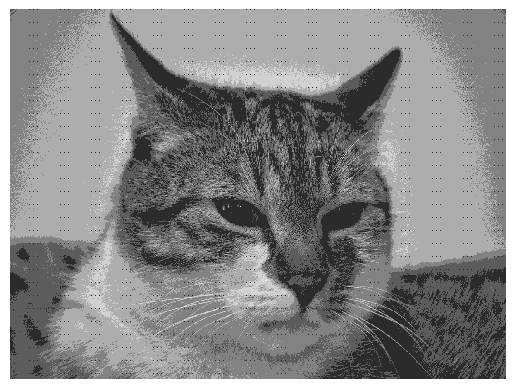

In [85]:
cat_with_dots = np.copy(img_as_np)

cat_with_dots[::10,::10] = 0

sns.heatmap(cat_with_dots, cmap=grayscale, xticklabels=False, yticklabels=False, cbar=False)


In [89]:
cat_with_dots.shape[1]-cat_with_dots.shape[0]

427